In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as MAE

In [2]:
# Load prediction and true data
true_value = pd.read_csv('node_true.csv', header=0, index_col=0).to_numpy()
prediction = pd.read_csv('node_pred.csv', header=0, index_col=0).to_numpy()

In [3]:
true_value.shape, prediction.shape

((118, 200), (118, 200))

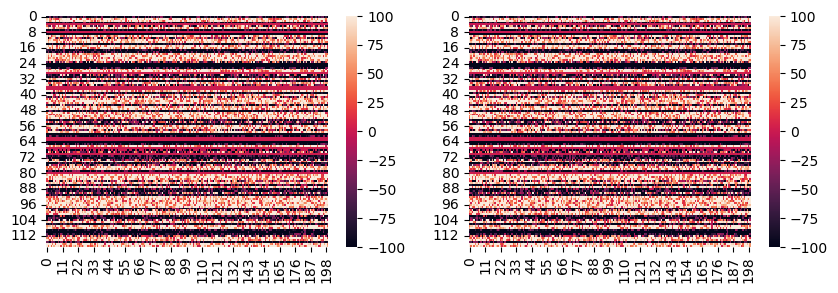

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.heatmap(true_value, ax=axes[0], vmin=-100, vmax=100)
sns.heatmap(prediction, ax=axes[1], vmin=-100, vmax=100)
plt.show()
plt.close('all')

In [5]:
# Save all figures
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 15
for i in range(true_value.shape[0]):
    plt.scatter(np.arange(true_value.shape[1]), true_value[i, :], marker='^', label='True value')
    plt.scatter(np.arange(true_value.shape[1]), prediction[i, :], marker='^', label='Prediction')
    plt.xlim(0, true_value.shape[1])
    plt.xlabel('Test instance')
    plt.ylabel('Active power (MW)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(f'node_prediction_figs/feature_{i+1}')
    plt.close()

In [6]:
# Calculate MAE
mae_error = MAE(true_value.T, prediction.T, multioutput='raw_values')

Text(0, 0.5, 'MAE of active power (MW)')

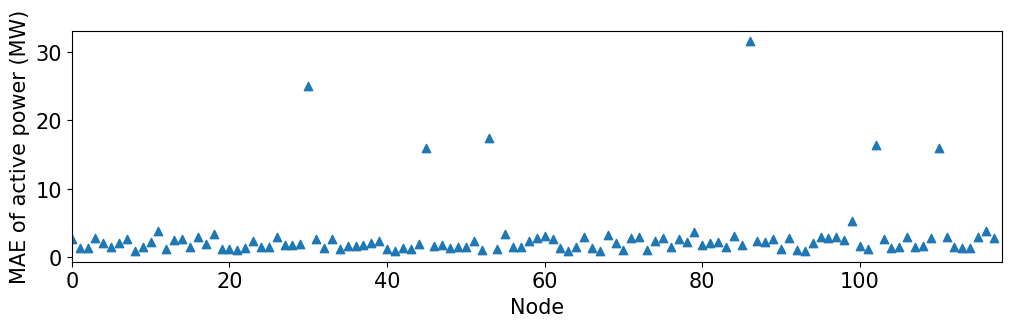

In [10]:
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 15
plt.scatter(np.arange(true_value.shape[0]), mae_error, marker='^')
plt.xlim((0, true_value.shape[0]))
plt.xlabel('Node')
# plt.yscale('log')
# plt.ylim((0, 2.5))
plt.ylabel('MAE of active power (MW)')